### Preparation
For this notebook to run the `predict` method of the `PvMonitoringServiceModel` class needs to return the rate beside the efficiency.  
To date, this means changing _line 64_ of _pv_monitoring_service_model.py_ from:  
    `return efficiency`  
  
to:  
    `return efficiency, rate`  

In [1]:
import os
os.chdir(r"c:\Users\GMark\Documents\efficientIO")

import datetime
from ai.utils.http_utils import fetch_data_from_http, append_data_to_dataframe_http
from ai.model_holder.pv_monitoring_service_model_holder import PvMonitoringServiceModelHolder
from ai.preprocessing.pv_monitoring_service_preprocessing import preprocess_pv_monitoring_service_data
import pandas as pd
import numpy as np


c:\Users\GMark\miniconda3\envs\ai-server\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
holzhausen = '038253bb-7266-4604-ac81-2f6edaa13be7'
angerbauer_jun = 'b9d9bf17-707e-440b-90bc-9db63a0cd2ca'
angerbauer_sen = '84ae8d96-4bb7-4025-bfad-5f7ea66f080e'
oamtc = 'c5725bba-8286-4e0d-a9f8-deb767705387'


model_holder = PvMonitoringServiceModelHolder.load_model_holder_from_s3(angerbauer_sen)

#ts0 = datetime.datetime.now()
#ts_start = int((ts0 - datetime.timedelta(days=5)).replace(second=0,microsecond=0, hour=0, minute=0).timestamp())
#ts_end = int(ts0.replace(hour=0, minute=0, second=0, microsecond=0).timestamp())


#efficiency, rate = model_holder.get_model().predict(df, 0)


def get_daily_data(start, end):
    current_day = datetime.datetime.now().day

    df = model_holder.get_dh().get_data(start, end)
    df = preprocess_pv_monitoring_service_data(df)
    return df

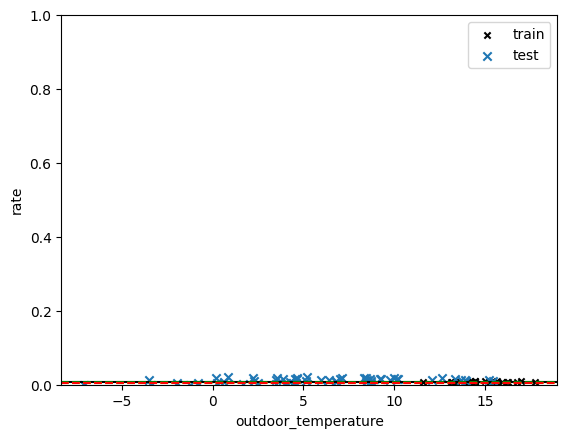

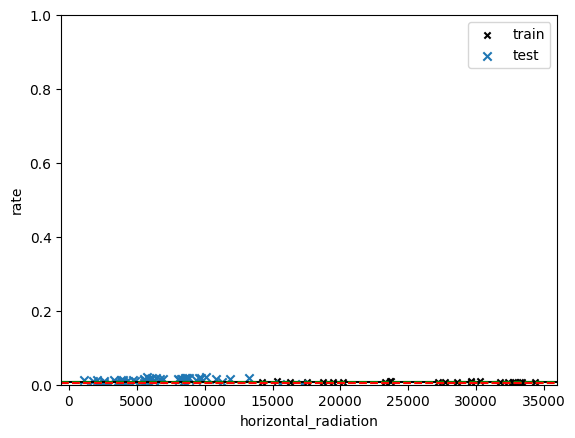

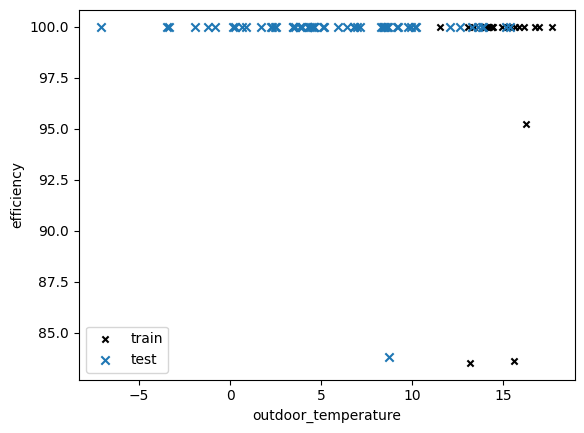

In [3]:
# train
start = int(datetime.datetime(2023,5,20).timestamp())
end = int(datetime.datetime(2023,6,12).timestamp())

df_train = get_daily_data(start, end)
efficiency, rate = model_holder.get_model().predict(df_train, 0)
df_train["rate"] = rate
df_train["efficiency"] = efficiency
factor = model_holder.get_model().factor

# test
start = int(datetime.datetime(2023,10,10).timestamp())
end = int(datetime.datetime(2023,12,4).timestamp())

df_test = get_daily_data(start, end)
efficiency, rate = model_holder.get_model().predict(df_test, 0)
df_test["rate"] = rate
df_test["efficiency"] = efficiency

# plot
ax = df_train.plot.scatter(x="outdoor_temperature", y="rate", marker="x", color="k", label = "train")
ax.scatter(x=df_test["outdoor_temperature"], y=df_test["rate"],label = "test", marker="x")
ax.legend()

ax.axhline(factor, color="k", linestyle="-")
ax.axhline(factor*0.9, color="g", linestyle="--")
ax.axhline(factor*0.8, color="y", linestyle="--")
ax.axhline(factor*0.5, color="r", linestyle="--")
ax.set_ylim(0,1)

# plot
ax0 = df_train.plot.scatter(x="horizontal_radiation", y="rate", marker="x", color="k", label = "train")
ax0.scatter(x=df_test["horizontal_radiation"], y=df_test["rate"],label = "test", marker="x")
ax0.legend()
ax0.set_ylim(0,1)



ax0.axhline(factor, color="k", linestyle="-")
ax0.axhline(factor*0.9, color="g", linestyle="--")
ax0.axhline(factor*0.8, color="y", linestyle="--")
ax0.axhline(factor*0.5, color="r", linestyle="--")

ax1 = df_train.plot.scatter(x="outdoor_temperature", y="efficiency", marker="x", color="k", label = "train")
ax1.scatter(x=df_test["outdoor_temperature"], y=df_test["efficiency"],label = "test", marker="x")
ax1.legend()





(0.0, 1.0)

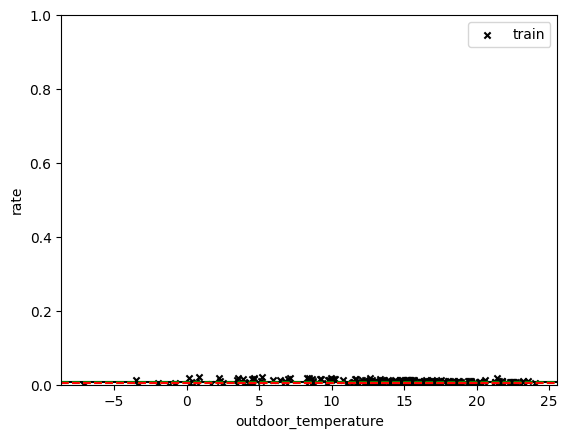

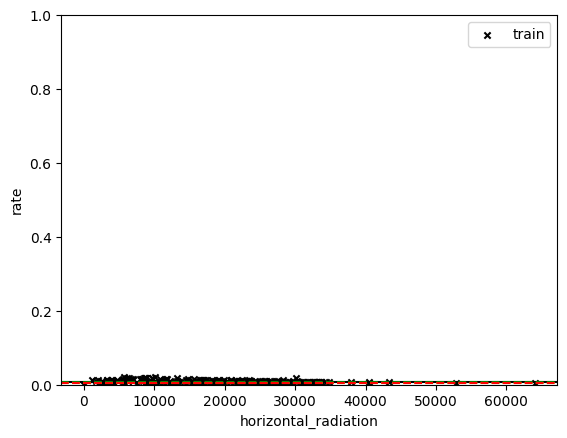

In [4]:
# year
start = int(datetime.datetime(2023,5,20).timestamp())
end = int(datetime.datetime(2023,12,4).timestamp())

df_test = get_daily_data(start, end)
efficiency, rate = model_holder.get_model().predict(df_test, 0)
df_test["rate"] = rate
df_test["efficiency"] = efficiency

# plot
ax0 = df_test.plot.scatter(x="outdoor_temperature", y="rate", marker="x", color="k", label = "train")
ax0.legend()
ax0.axhline(factor, color="k", linestyle="-")
ax0.axhline(factor*0.9, color="g", linestyle="--")
ax0.axhline(factor*0.8, color="y", linestyle="--")
ax0.axhline(factor*0.5, color="r", linestyle="--")
ax0.set_ylim(0,1)

# plot
ax1 = df_test.plot.scatter(x="horizontal_radiation", y="rate", marker="x", color="k", label = "train")
ax1.legend()
ax1.axhline(factor, color="k", linestyle="-")
ax1.axhline(factor*0.9, color="g", linestyle="--")
ax1.axhline(factor*0.8, color="y", linestyle="--")
ax1.axhline(factor*0.5, color="r", linestyle="--")
ax1.set_ylim(0,1)


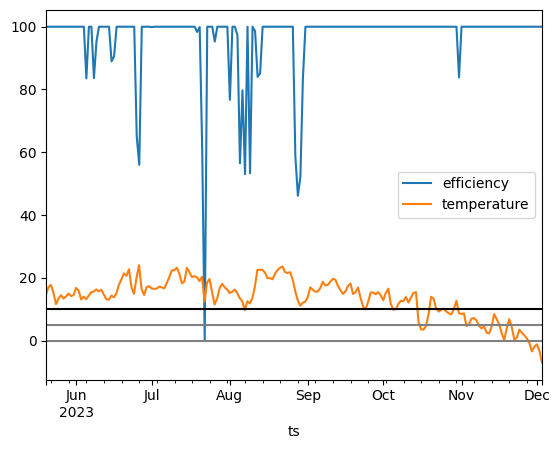

In [5]:
ax = (df_test["efficiency"]).plot(label="efficiency")
ax.plot(df_test["outdoor_temperature"], label="temperature")
#ax.plot(df_test["horizontal_radiation"]/100, label="radiation/100")
ax.axhline(10, color="k")
ax.axhline(5, color="grey")
ax.axhline(0, color="grey")
ax.legend()